In [40]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os

import astropy
from astropy.coordinates import SkyCoord
from astropy.table import join
import astropy.units as u

import sys
sys.path.insert(0,'../code')
%load_ext autoreload
%autoreload 
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams["font.family"] = "sans-serif"
# matplotlib.rcParams["font.family"] = "serif"
# matplotlib.rcParams['font.serif'] = "Times New Roman"

matplotlib.rc('text', usetex=True)

In [3]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

name_gpurer = "\emph{{Gaia}} DR3 Quasars `Purer' Sample"
abbrv_gpurer = "\emph{{Gaia}} DR3 `Purer'"

name_gall = "\emph{{Gaia}} DR3 Quasar Candidates"
abbrv_gall = "\emph{{Gaia}} DR3 Quasar Candidates"

name_sqall = "SDSS DR16Q Quasars"
abbrv_sqall = "SDSS DR16Q Quasars"

In [4]:
name_zgaia = "\emph{{Gaia}} redshift" 
abbrv_zgaia = "z_\mathrm{Gaia}"

name_zsdss = "\emph{{SDSS}} redshift" 
abbrv_zsdss = "z_\mathrm{SDSS}"

name_zspz = f"{abbrv_catalog} redshift" 
abbrv_zspz = f"z_\mathrm{{{abbrv_catalog}}}"

In [5]:
G_hi = 20.5
G_lo = 20.0

In [6]:
fn_gcathi = f'../data/catalog_G{G_hi}.fits'
tab_gcathi = utils.load_table(fn_gcathi)
print(len(tab_gcathi))

1295502


In [41]:
plot_dir = '../plots/2023-11-16_figures_response_to_referee'
os.makedirs(plot_dir, exist_ok=True) 
save = True

# GALEX cross-match check

In [7]:
fn_gaia_galex = '../data/gaia_galex.fits.gz'
print("Loading data")
tab_gaia_galex = utils.load_table(fn_gaia_galex)
print(tab_gaia_galex.columns)

Loading data
<TableColumns names=('ra','dec','source_id','raj2000','dej2000','fuvmag','nuvmag','objid')>


In [8]:
i_has_fuv = np.isfinite(tab_gaia_galex['fuvmag'])
print(np.sum(i_has_fuv)/len(i_has_fuv))
print(np.sum(i_has_fuv), len(i_has_fuv))

0.04299820037472391
285902 6649162


In [9]:
i_has_nuv = np.isfinite(tab_gaia_galex['nuvmag'])
print(np.sum(i_has_nuv)/len(i_has_nuv))
print(np.sum(i_has_nuv), len(i_has_nuv))

0.09610173432381404
638996 6649162


In [46]:
tab_gcathi_galex = astropy.table.join(tab_gcathi, tab_gaia_galex, keys='source_id', join_type='left', 
                                      metadata_conflicts='silent')

In [35]:
i_has_fuv = np.isfinite(tab_gcathi_galex['fuvmag'])
print(np.sum(i_has_fuv)/len(i_has_fuv))
print(np.sum(i_has_fuv), len(i_has_fuv))

0.15706266759912374
203475 1295502


In [36]:
i_has_nuv = np.isfinite(tab_gcathi_galex['nuvmag'])
print(np.sum(i_has_nuv)/len(i_has_nuv))
print(np.sum(i_has_nuv), len(i_has_nuv))

0.31573243422240954
409032 1295502


In [57]:
bins = np.arange(14, 20.5+0.25, 0.25)
print(bins)

[14.   14.25 14.5  14.75 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75
 17.   17.25 17.5  17.75 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75
 20.   20.25 20.5 ]


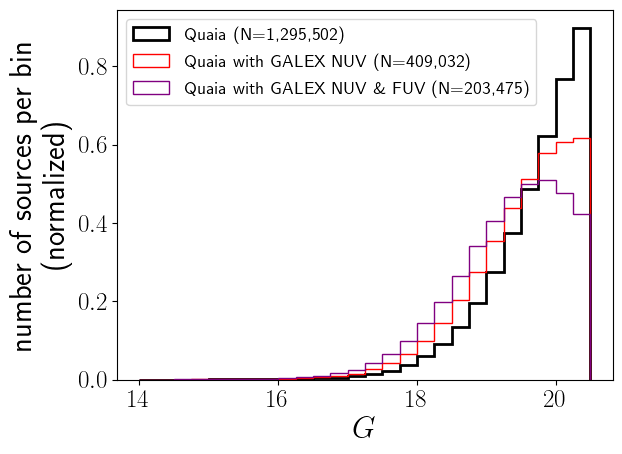

In [58]:
plt.hist(tab_gcathi_galex['phot_g_mean_mag'], histtype='step', bins=bins, density=True, 
         color='k', label=f'Quaia (N={len(tab_gcathi_galex):,})', lw=2)
plt.hist(tab_gcathi_galex[i_has_nuv]['phot_g_mean_mag'], histtype='step', bins=bins, density=True, 
         color='red', label=f'Quaia with GALEX NUV (N={np.sum(i_has_nuv):,})')
plt.hist(tab_gcathi_galex[i_has_fuv & i_has_nuv]['phot_g_mean_mag'], histtype='step', bins=bins, density=True, 
         color='purple', label=f'Quaia with GALEX NUV \& FUV (N={np.sum(i_has_fuv & i_has_nuv):,})')

plt.xlabel(r'$G$')
plt.ylabel('number of sources per bin \n (normalized)')
plt.legend(fontsize=13)

fn = f'{plot_dir}/galex_check_norm.png'
if save:
    plt.savefig(fn, bbox_inches='tight')

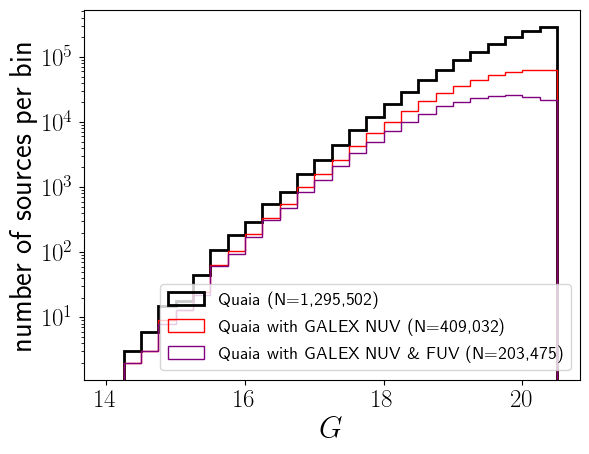

In [60]:
plt.hist(tab_gcathi_galex['phot_g_mean_mag'], histtype='step', bins=bins, density=False, 
         color='k', label=f'Quaia (N={len(tab_gcathi_galex):,})', lw=2)
plt.hist(tab_gcathi_galex[i_has_nuv]['phot_g_mean_mag'], histtype='step', bins=bins, density=False, 
         color='red', label=f'Quaia with GALEX NUV (N={np.sum(i_has_nuv):,})')
plt.hist(tab_gcathi_galex[i_has_fuv & i_has_nuv]['phot_g_mean_mag'], histtype='step', bins=bins, density=False, 
         color='purple', label=f'Quaia with GALEX NUV \& FUV (N={np.sum(i_has_fuv & i_has_nuv):,})')

plt.xlabel(r'$G$')
plt.ylabel('number of sources per bin')
plt.legend(fontsize=13)

plt.yscale('log')

fn = f'{plot_dir}/galex_check.png'
if save:
    plt.savefig(fn, bbox_inches='tight')

## estimate of true quasars vs seyfert-like

In [13]:
tab_sqclean = utils.load_table(f'../data/quasars_sdss_clean.fits')
print(f"Number of SDSS quasars in clean Quaia catalog: {len(tab_sqclean)}")
print(tab_sqclean.columns)

Number of SDSS quasars in clean Quaia catalog: 243206
<TableColumns names=('source_id','objid','z_sdss','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs','redshift_qsoc','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','ebv','A_v','pm','mag_w1_vg','mag_w2_vg','unwise_objid','rand_ints','g_rp','bp_g','bp_rp','g_w1','w1_w2')>


For some reason both tables have a small number of masked values that are messing with the join; just ignore these objects

In [14]:
#i_has_objid = np.isfinite(tab_sqclean['objid'])
i_has_objid = ~tab_sqclean['objid'].mask
print(np.sum(i_has_objid), np.sum(~i_has_objid), len(i_has_objid))
tab_sqclean_has_objid = tab_sqclean[i_has_objid]
print(len(tab_sqclean_has_objid))

243121 85 243206
243121


In [15]:
tab_gcathi.columns

<TableColumns names=('source_id','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs','redshift_qsoc','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','ebv','A_v','pm','mag_w1_vg','mag_w2_vg','unwise_objid','rand_ints','g_rp','bp_g','bp_rp','g_w1','w1_w2','redshift_spz_raw','redshift_spz_err','redshift_spz')>

In [16]:
tab_gcathi_sourceids = tab_gcathi.copy()
tab_gcathi_sourceids.keep_columns(['source_id'])

In [17]:
tab_sqclean_ingcathi = join(tab_sqclean_has_objid, tab_gcathi_sourceids, keys='source_id', join_type='inner')
print(len(tab_sqclean_ingcathi))

221678


In [18]:
tab_sdss = utils.load_table('../data/SDSS_DR16Q_v4_slim.fits')
print(f"Number of SDSS quasars: {len(tab_sdss)}")
print(tab_sdss.columns)

Number of SDSS quasars: 750414
<TableColumns names=('SDSS_NAME','RA','DEC','THING_ID','Z','ZWARNING','OBJID','u_mag_sdss','u_mag_err_sdss','g_mag_sdss','g_mag_err_sdss','r_mag_sdss','r_mag_err_sdss','i_mag_sdss','i_mag_err_sdss','z_mag_sdss','z_mag_err_sdss')>


In [19]:
i_sdss_has_objid = ~tab_sdss['OBJID'].mask
print(np.sum(i_sdss_has_objid), np.sum(~i_sdss_has_objid), len(i_sdss_has_objid))
tab_sdss_has_objid = tab_sdss[i_sdss_has_objid]
print(len(tab_sdss_has_objid))

749413 1001 750414
749413


In [20]:
tab_sdss_has_objid['objid'] = [int(tab_sdss_has_objid['OBJID'][i]) for i in range(len(tab_sdss_has_objid))]

In [21]:
tab_sqgcathi_sdss = join(tab_sqclean_ingcathi, tab_sdss_has_objid, keys=['objid'], join_type='left')

In [22]:
tab_sqgcathi_sdss.columns

<TableColumns names=('source_id','objid','z_sdss','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs','redshift_qsoc','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','ebv','A_v','pm','mag_w1_vg','mag_w2_vg','unwise_objid','rand_ints','g_rp','bp_g','bp_rp','g_w1','w1_w2','SDSS_NAME','RA','DEC','THING_ID','Z','ZWARNING','OBJID','u_mag_sdss','u_mag_err_sdss','g_mag_sdss','g_mag_err_sdss','r_mag_sdss','r_mag_err_sdss','i_mag_sdss','i_mag_err_sdss','z_mag_sdss','z_mag_err_sdss')>

In [23]:
G_minus_i = tab_sqgcathi_sdss['phot_g_mean_mag'] - tab_sqgcathi_sdss['i_mag_sdss']

In [24]:
G_minus_i_med = np.median(G_minus_i)
G_minus_i_med

0.063913345

In [25]:
tab_gcathi['i_mag_sdss_effective'] = tab_gcathi['phot_g_mean_mag'] - G_minus_i_med

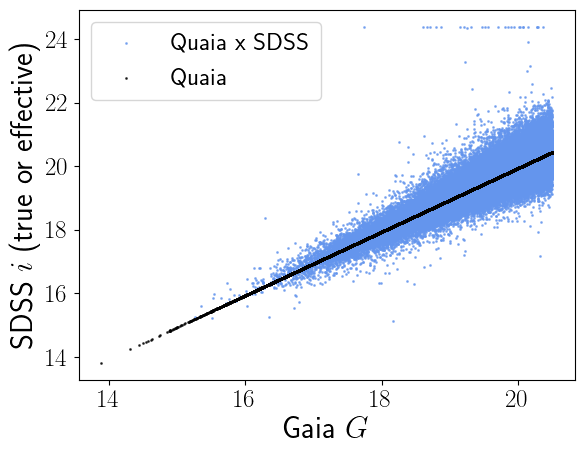

In [26]:
plt.scatter(tab_sqgcathi_sdss['phot_g_mean_mag'], tab_sqgcathi_sdss['i_mag_sdss'], 
            s=1, alpha=0.7, color='cornflowerblue', label='Quaia x SDSS')
plt.scatter(tab_gcathi['phot_g_mean_mag'], tab_gcathi['i_mag_sdss_effective'], 
            s=1, alpha=0.7, color='k', label='Quaia')
plt.xlabel(r'Gaia $G$')
plt.ylabel(r'SDSS $i$ (true or effective)')
plt.legend()

In [27]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
print(cosmo)
print(cosmo.Ode0)

FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
0.7


In [28]:
def m_to_M(ms, zs, cosmo, Avs=None, ebvs=None, Ab_over_ebv=None):
    
    ds = cosmo.comoving_distance(zs)
    Ms = ms.value - 5*np.log10(ds.to('parsec')/(10*u.parsec))
    if ebvs is not None:
        assert Ab_over_ebv is not None, "Must pass Ab correction!"
        Abs = Ab_over_ebv*ebvs
        Ms -= Abs
    if Avs is not None:
        Ms -= Avs
    return Ms

In [29]:
# Value of Av/E(B-V) from Table 6 (SDSS i-band, R_v=3.1) of Schlafly+2011, https://iopscience.iop.org/article/10.1088/0004-637X/737/2/103
Ai_over_ebv=1.698 #SDSS i band
M_i = m_to_M(tab_gcathi['i_mag_sdss_effective'], tab_gcathi['redshift_spz'], cosmo, 
             ebvs=tab_gcathi['ebv'], Ab_over_ebv=Ai_over_ebv
             #Avs=tab_gcathi['A_v']
            )

In [30]:
M_i_lim = -22

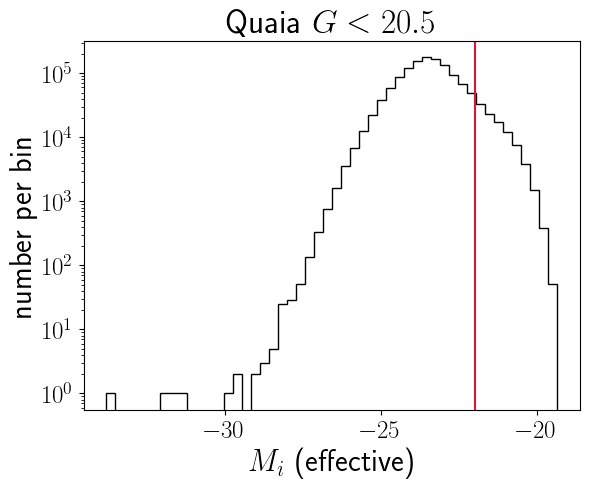

In [31]:
_ = plt.hist(M_i, bins=50, histtype='step', color='black')
plt.yscale('log')
plt.xlabel(r'$M_i$ (effective)')
plt.ylabel('number per bin')
plt.title(r'Quaia $G<20.5$')

plt.axvline(M_i_lim, color='crimson')

In [32]:
print(f'number with M_i<{M_i_lim}: {np.sum(M_i < M_i_lim)}')
print(f'% with M_i<{M_i_lim}: {np.sum(M_i < M_i_lim)/len(M_i)*100:.2f}%')

number with M_i<-22: 1191151
% with M_i<-22: 91.95%


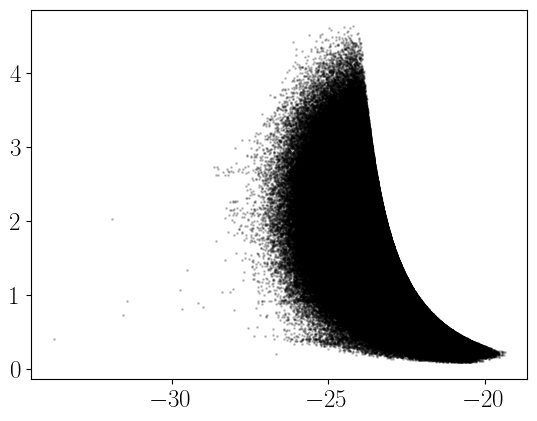

In [33]:
plt.scatter(M_i, tab_gcathi['redshift_spz'], color='k', s=1, alpha=0.2)

# investigating bright source redshift uncertainty

In [34]:
redshift_estimator_name = 'kNN'
save_tag_model = f'_K27_std'
fn_spz_labeled = f'../data/redshift_estimates/redshifts_spz_labeled_{redshift_estimator_name}{save_tag_model}.fits'
tab_spz_labeled = utils.load_table(fn_spz_labeled)
print(f"N = {len(tab_spz_labeled)}")
print(tab_spz_labeled.columns)

N = 243206
<TableColumns names=('source_id','z_sdss','phot_g_mean_mag','redshift_qsoc','rand_ints','redshift_spz_raw','redshift_spz_err','redshift_spz')>


In [35]:
rand_ints_labeled = tab_spz_labeled['rand_ints']
i_train, i_valid, i_test = utils.split_train_val_test(rand_ints_labeled,
                                 frac_train=0.7, frac_val=0.15, frac_test=0.15)

In [41]:
idx_Glo_test = tab_spz_labeled['phot_g_mean_mag'][i_test] < G_lo

In [42]:
idx_Ghi_test = tab_spz_labeled['phot_g_mean_mag'][i_test] < G_hi

In [43]:
z_sdss_test = tab_spz_labeled['z_sdss'][i_test]
z_spzraw_test = tab_spz_labeled['redshift_spz_raw'][i_test]
z_spz_test = tab_spz_labeled['redshift_spz'][i_test]
z_gaia_test = tab_spz_labeled['redshift_qsoc'][i_test]

In [44]:
dz_spzraw_test = (z_spzraw_test - z_sdss_test)/(1+z_sdss_test)
dz_spz_test = (z_spz_test - z_sdss_test)/(1+z_sdss_test)
dz_gaia_test = (z_gaia_test - z_sdss_test)/(1+z_sdss_test)

In [45]:
z_bins = np.linspace(0, np.max(z_gaia_test), 200)

In [46]:
G_test = tab_spz_labeled['phot_g_mean_mag'][i_test]

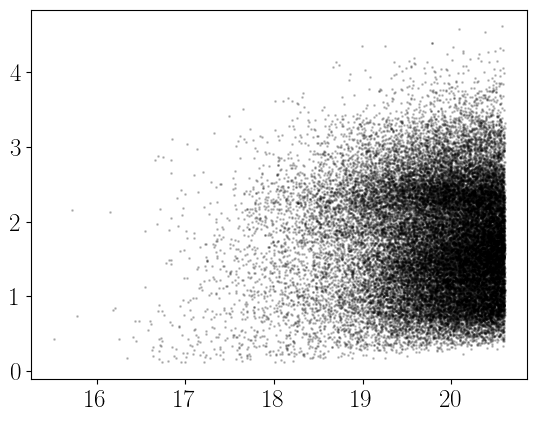

In [49]:
plt.scatter(G_test, z_spz_test, color='k', alpha=0.2, s=1)

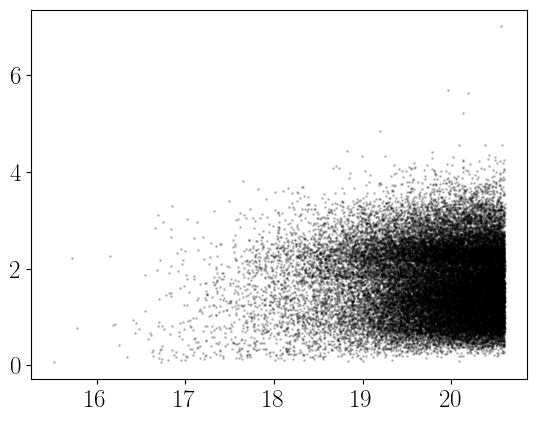

In [50]:
plt.scatter(G_test, z_sdss_test, color='k', alpha=0.2, s=1)

In [ ]:
plt.scatter(G_test, z_sdss_test, color='k', alpha=0.2, s=1)

Text(0.5, 0, '$z$')

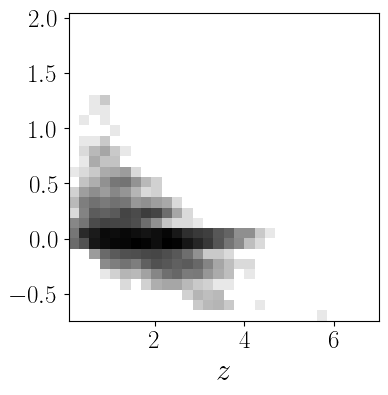

In [80]:
plt.figure(figsize=(4,4))
plt.hist2d(z_sdss_test, dz_spz_test, 
           norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray_r, bins=30)
plt.xlabel(r'$z$')

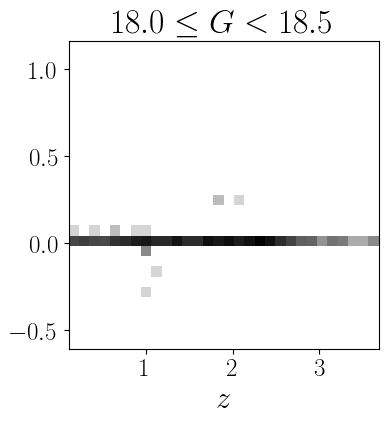

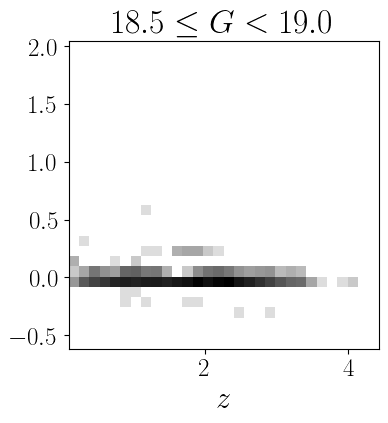

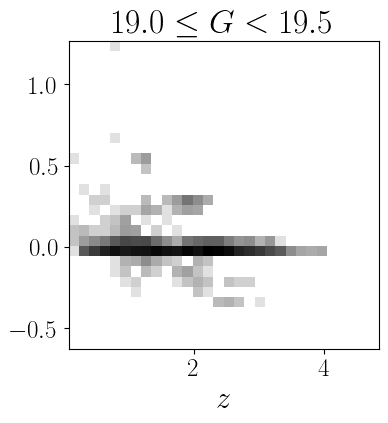

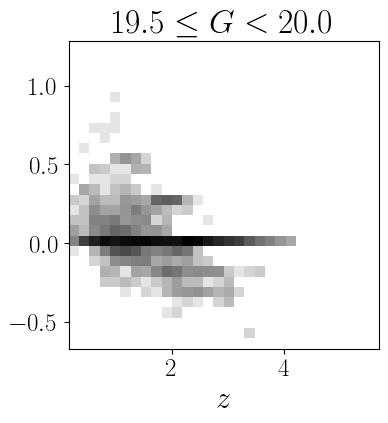

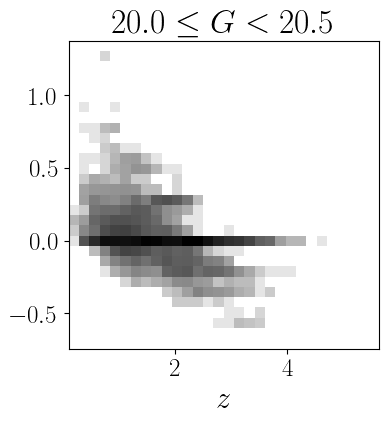

In [71]:
G_maxs = np.arange(18.0, 20.501, 0.5)
for i in range(len(G_maxs)-1):
    i_insample = (G_test >= G_maxs[i]) & (G_test < G_maxs[i+1])
    
    plt.figure(figsize=(4,4))
    plt.title(rf"${G_maxs[i]} \leq G < {G_maxs[i+1]}$")
    plt.hist2d(z_sdss_test[i_insample], dz_spz_test[i_insample], 
               norm=matplotlib.colors.LogNorm(), cmap=plt.cm.gray_r, bins=30)
    plt.xlabel(r'$z$')


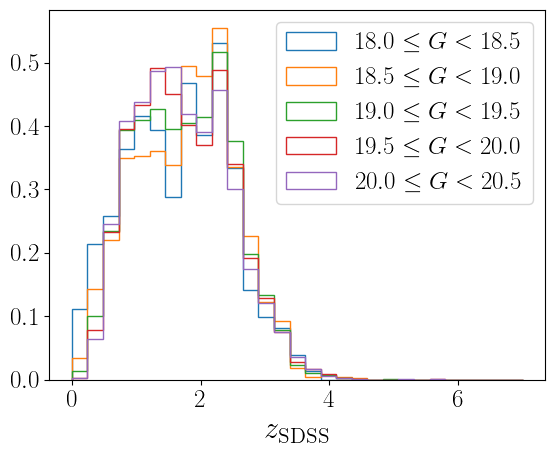

In [79]:
G_maxs = np.arange(18.0, 20.501, 0.5)
z_bins = np.linspace(0, np.max(z_sdss_test), 30)
for i in range(len(G_maxs)-1):
    i_insample = (G_test >= G_maxs[i]) & (G_test < G_maxs[i+1])
    
    label = rf"${G_maxs[i]} \leq G < {G_maxs[i+1]}$"
    plt.hist(z_sdss_test[i_insample], bins=z_bins, histtype='step', label=label, density=True)
    plt.xlabel(r'$z_\mathrm{SDSS}$')
    
plt.legend()

In [83]:
cmap_anim = utils.shiftedColorMap(matplotlib.cm.plasma_r, start=0.2, midpoint=0.6, stop=1.0)
cmap_map = 'plasma'
cmap_blues = utils.shiftedColorMap(matplotlib.cm.Blues, start=0.2, midpoint=0.6, stop=1.0)
cmap_hist = utils.shiftedColorMap(matplotlib.cm.inferno_r, start=0.1, midpoint=0.55, stop=1.0)

color_gaia = 'purple'

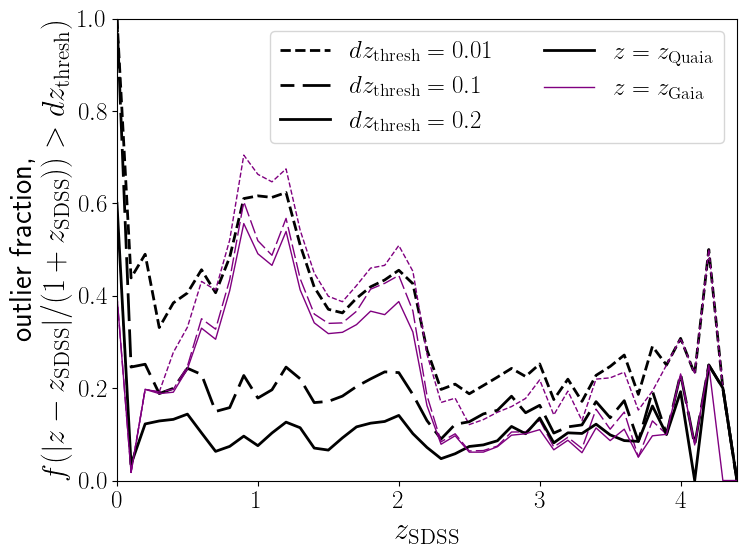

In [93]:
plt.figure(figsize=(8,6))
ax = plt.gca()

# G_arr = tab_spz_labeled['phot_g_mean_mag'][i_test]
# G_maxs = np.arange(18.0, 20.501, 0.1)

z_bins_wide = np.arange(0, 4.5, 0.1)

dz_threshs = [0.01, 0.1, 0.2]
alphas = [0.4, 0.6, 0.8, 1]
lss = ['--', (5, (10,3)), '-']
for iz, dz_thresh in enumerate(dz_threshs):
    n_insample = np.empty(len(z_bins_wide), dtype=int)
    f_outliers_spz = np.empty(len(z_bins_wide))
    f_outliers_gaia = np.empty(len(z_bins_wide))

    for i in range(len(z_bins_wide)-1):
        i_insample = (z_sdss_test >= z_bins_wide[i]) & (z_sdss_test < z_bins_wide[i+1])
        n_insample[i] = np.sum(i_insample)
        
        f_outliers_spz[i] = np.sum(np.abs(dz_spz_test[i_insample]) > dz_thresh) / n_insample[i]
        f_outliers_gaia[i] = np.sum(np.abs(dz_gaia_test[i_insample]) > dz_thresh) / n_insample[i]
        
    plt.plot(z_bins_wide, f_outliers_spz, color='k', alpha=1, ls=lss[iz], lw=2, label=fr'$dz_\mathrm{{thresh}}={dz_thresh}$')
    plt.plot(z_bins_wide, f_outliers_gaia, color=color_gaia, alpha=1, ls=lss[iz], lw=1)

plt.xlabel(rf"${abbrv_zsdss}$")
plt.ylabel('outlier fraction,\n' + rf'$f(|z-{abbrv_zsdss}|/(1+{abbrv_zsdss}))>dz_\mathrm{{thresh}})$')
plt.ylim(0, 1.0)
plt.xlim(np.min(z_bins_wide), np.max(z_bins_wide))


handles, labels = ax.get_legend_handles_labels()
line_spz = Line2D([], [], color='k', lw=2)
line_gaia = Line2D([], [], color=color_gaia, lw=1)
handles.extend([line_spz, line_gaia])
labels.extend([f'$z={abbrv_zspz}$', f'$z={abbrv_zgaia}$'])

plt.legend(handles, labels, ncol=2)

plt.axvline(20.0, color='grey', lw=0.8)